# Smart Agriculture Advisory System

## Overview
The Smart Agriculture Advisory System is an application designed to provide farmers with personalized advice on crop management, pest control, and irrigation scheduling. By leveraging machine learning models, the system analyzes various environmental and soil parameters to recommend the most suitable crops for cultivation.

## Dataset
The dataset used for this project is sourced from Kaggle: [Crop Recommendation Dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset).

### Features
- **N (Nitrogen)**: Nitrogen content in the soil
- **P (Phosphorus)**: Phosphorus content in the soil
- **K (Potassium)**: Potassium content in the soil
- **temperature**: Temperature in degree Celsius
- **humidity**: Relative humidity in %
- **ph**: pH value of the soil
- **rainfall**: Rainfall in mm

### Target
- **label**: Type of crop to be grown

## Installation

### Prerequisites
- [Anaconda](https://www.anaconda.com/products/individual#download-section): A distribution of Python and R for scientific computing and data science.

### Steps

1. **Install Anaconda**

    Download and install Anaconda from the [official website](https://www.anaconda.com/products/individual#download-section) based on your operating system.

2. **Clone the Repository**

    ```bash
    git clone https://github.com/your-username/smart-agriculture-advisory-system.git
    cd smart-agriculture-advisory-system
    ```

3. **Create a Conda Environment**

    ```bash
    conda create --name smart-agriculture python=3.8
    conda activate smart-agriculture
    ```

4. **Install Required Libraries**

    ```bash
    pip install -r requirements.txt
    ```

5. **Install Jupyter Notebook**

    ```bash
    conda install -c conda-forge notebook
    ```

## Usage

1. **Run Jupyter Notebook**

    ```bash
    jupyter notebook
    ```

2. **Open the Notebook**

    In the Jupyter Notebook interface, open `notebooks/Smart_Agriculture_Advisory_System.ipynb` to explore the analysis, model training, and predictions.

## Project Structure

- `data/`: Contains the dataset used for training and testing.
- `notebooks/`: Jupyter notebooks for data analysis and model building.
- `models/`: Saved machine learning models.
- `scripts/`: Python scripts for data processing and model training.
- `requirements.txt`: List of required Python libraries.

## Model Details

### Model Selection
Several machine learning models were evaluated for this multi-class classification problem. The final model chosen for deployment is a Random Forest classifier due to its high accuracy and robustness.

### Model Training
The model was trained using the following steps:

1. **Data Preprocessing**: Handling missing values, scaling features, and encoding categorical variables.
2. **Feature Selection**: Identifying the most important features contributing to the prediction.
3. **Model Training**: Training the Random Forest classifier with hyperparameter tuning using GridSearchCV.

### Model Evaluation
The model's performance was evaluated using accuracy, precision, recall, and F1-score. Cross-validation was also performed to ensure the model's robustness.

## Contributing

Contributions are welche [scikit-learn](https://scikit-learn.org/) community for providing excellent machine learning tools.


In [1]:
#Import all the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models for scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [4]:
df=pd.read_csv("Crop_recommendation.csv")
df.shape

(2200, 8)

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [10]:
df["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

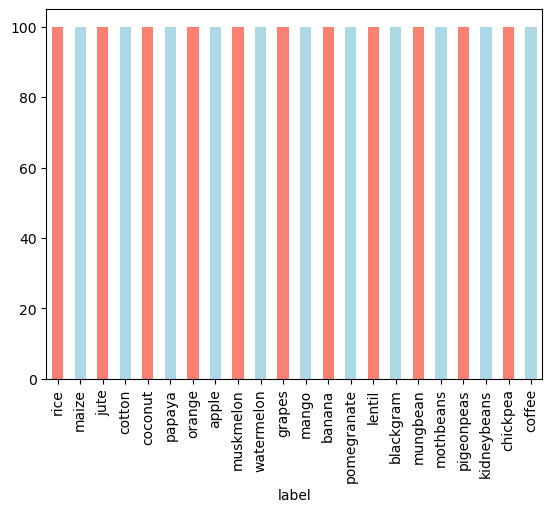

In [12]:
df["label"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [13]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
df["N"].value_counts()

N
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: count, Length: 137, dtype: int64

In [17]:
df["ph"].value_counts()

ph
6.502985    1
6.640471    1
6.251420    1
6.274453    1
6.135996    1
           ..
7.538631    1
7.127064    1
6.628265    1
6.726469    1
6.779833    1
Name: count, Length: 2200, dtype: int64

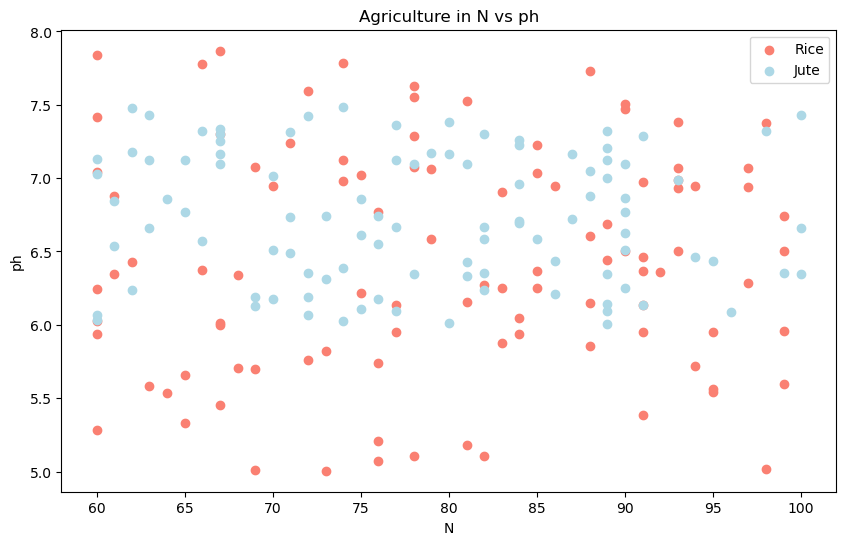

In [19]:
#create another figure
plt.figure(figsize=(10,6))

#scatter with positive example
plt.scatter(df.N[df.label=="rice"],df.ph[df.label=="rice"],c="salmon");

#scatter with negative example
plt.scatter(df.N[df.label=="jute"],df.ph[df.label=="jute"],c="lightblue");
plt.title("Agriculture in N vs ph")
plt.xlabel("N")
plt.ylabel("ph")
plt.legend(["Rice", "Jute"]);